In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [6]:
full = pd.read_csv('train_set_nonscaled.csv')

In [8]:
full.head(5)

,parcelid,logerror,lotsizesquarefeet,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,calculatedfinishedsquarefeet,month,hashottuborspa,...,regionidcounty,regionidzip,roomcnt,yearbuilt,taxdelinquencyflag,rawcensustractandblock,bathroomcnt,censustractandblock,bedroomcnt,fireplaceflag
0,11016594,0.0276,7528.0,122754.0,360170.0,237416.0,6735.88,1684,1,0,...,3101,96370,0,1959,0,6.037107e+07,2.0,60371066461001,3,0
1,12098116,-0.0040,11423.0,61994.0,119906.0,57912.0,11484.48,2217,1,0,...,3101,96293,0,1940,0,6.037464e+07,3.0,60374638003004,2,0
2,12643413,0.0218,70859.0,171518.0,244880.0,73362.0,3048.74,839,1,0,...,3101,96222,0,1987,0,6.037296e+07,2.0,60372963002002,2,0
3,14432541,-0.0050,6000.0,169574.0,434551.0,264977.0,5488.96,2283,1,0,...,1286,96961,8,1981,0,6.059042e+07,2.5,60590423381006,4,0
4,11509835,-0.2705,2708.0,880650.0,2447951.0,1567301.0,27126.57,3067,1,0,...,3101,96109,0,1982,0,6.037621e+07,4.0,60376210044006,4,0


### Cross Validation

#### Train-test split.

In [19]:
full_set = full.drop('parcelid',axis =1)
full_set.head()


,logerror,lotsizesquarefeet,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,calculatedfinishedsquarefeet,month,hashottuborspa,latitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,taxdelinquencyflag,rawcensustractandblock,bathroomcnt,censustractandblock,bedroomcnt,fireplaceflag
0,0.0276,7528.0,122754.0,360170.0,237416.0,6735.88,1684,1,0,34280990,...,3101,96370,0,1959,0,6.037107e+07,2.0,60371066461001,3,0
1,-0.0040,11423.0,61994.0,119906.0,57912.0,11484.48,2217,1,0,34136312,...,3101,96293,0,1940,0,6.037464e+07,3.0,60374638003004,2,0
2,0.0218,70859.0,171518.0,244880.0,73362.0,3048.74,839,1,0,33755800,...,3101,96222,0,1987,0,6.037296e+07,2.0,60372963002002,2,0
3,-0.0050,6000.0,169574.0,434551.0,264977.0,5488.96,2283,1,0,33485643,...,1286,96961,8,1981,0,6.059042e+07,2.5,60590423381006,4,0
4,-0.2705,2708.0,880650.0,2447951.0,1567301.0,27126.57,3067,1,0,33870089,...,3101,96109,0,1982,0,6.037621e+07,4.0,60376210044006,4,0


In [18]:
X = full_set.drop('logerror',axis=1)
y = full_set['logerror']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=0)
                                                         
                                                                                                 

### Random Forest

In [31]:
X_train.shape
from math import sqrt
sqrt(22)

4.69041575982343

In [189]:
parameters = {'n_estimators':[5,10,20,100,1000],'n_jobs':[-1],'oob_score':[False],'max_features':["sqrt"]}

rf_reg = RandomForestRegressor(verbose=1)


In [190]:
rf_cv = GridSearchCV(rf_reg,
                    param_grid = parameters,
                    scoring = 'neg_mean_absolute_error',
                    cv=3)


In [191]:
rf_cv.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_job

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=1, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 20, 100, 1000], 'n_jobs': [-1], 'oob_score': [False], 'max_features': ['sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

best cv parameters

In [192]:
print(rf_cv.best_params_)

{'max_features': 'sqrt', 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False}


In [133]:
def feature_importance(estimator,labels):
    feature_imp = pd.DataFrame.from_dict({'feature':labels,
                                         'importance':estimator.feature_importances_})
    feature_imp.set_index('feature',
                          inplace=False,
                          drop=True)
    feature_imp = feature_imp.sort_values('importance',ascending=False)
    return(feature_imp)
    
    

In [193]:
featureImportance = feature_importance(rf_cv.best_estimator_, X_train.columns)

In [194]:
featureImportance


,feature,importance
1,structuretaxvaluedollarcnt,0.085605
4,taxamount,0.083288
5,calculatedfinishedsquarefeet,0.082269
2,taxvaluedollarcnt,0.081811
3,landtaxvaluedollarcnt,0.080706
8,latitude,0.078395
0,lotsizesquarefeet,0.077873
9,longitude,0.077280
15,yearbuilt,0.063726
13,regionidzip,0.046730


(-1, 22)

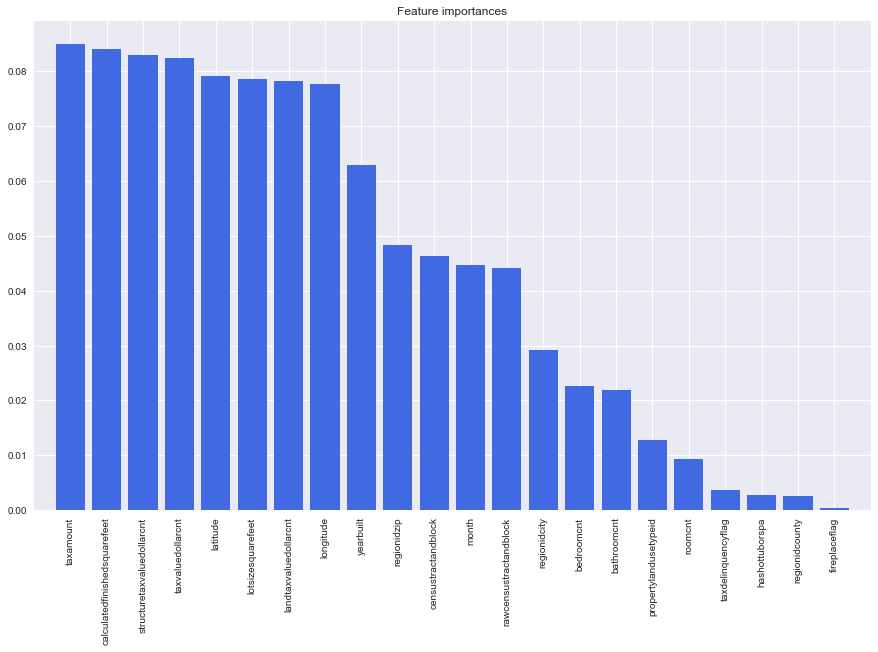

In [187]:
plt.figure(figsize=(15,9))
plt.title("Feature importances")
plt.bar(np.arange(len(featureImportance.feature)),featureImportance.importance,color="royalblue",align='center')
plt.xticks(np.arange(len(featureImportance.feature)), featureImportance.feature, rotation='vertical')
plt.xlim([-1, len(featureImportance.feature)])



In [155]:
plt.show()

In [195]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,rf_cv.best_estimator_.predict(X_test))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   11.6s finished


0.070713221957104153

### Gradient Boosting Regression